In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision

import tqdm

# Solve the regression problem by MLP
## Model: y = f(x) + delta
## Estimate f(*) by network

## Function Definition

In [2]:
# f(*)
def target_function(x):
    return x**3 - 12*x**2 +44*x -18 + np.random.randn(len(x))

# sigmoid function
class Sigmoid():
    def __init__(self):
        pass
    
    def __call__(self, x):
        sigmoid_range = 34.


        if not isinstance(x, np.ndarray):
            if x <= -sigmoid_range:
                return 1e-15
            if x >= sigmoid_range:
                return 1.0 - 1e-15
        else:
            x[x <= -sigmoid_range] = 1e-15
            x[x >= sigmoid_range] = 1.0 - 1e-15
        

        return 1.0 / (1.0 + np.exp(-x))
    
    def gradient(self, x):
        return (1.0 - self(x)) * self(x)


def identity_function(x):
    return x

## MLP Class Definition

In [3]:
class RegressionMLP():
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        self.sigmoid = Sigmoid()    # sigmoid function
        self.lr = 0.01              # leaning rate
        self.w1 = 2 * np.random.randn(input_layer_size, hidden_layer_size)  # initial value of weight
        self.b1 = 2 * np.random.randn(hidden_layer_size)                    # initial value of bias
        self.w2 = 2 * np.random.randn(hidden_layer_size, output_layer_size) # initial value of weight
        self.b2 = 2 * np.random.randn(output_layer_size)                    # initial value of bias

        self.a1 = np.array([])
        self.z1 = np.array([])

        self.w1_grad = np.array([])
        self.b1_grad = np.array([])
        self.w2_grad = np.array([])
        self.b2_grad = np.array([])

    def forward(self, x):
        self.a1 = np.dot(x, self.w1) + self.b1      # input of hidden layer
        self.z1 = self.sigmoid(self.a1)             # output of hidden layer
        a2 = np.dot(self.z1, self.w2) + self.b2     # input of output layer
        y_pred = identity_function(a2)              # output of output layer
        return y_pred
    
    def backward(self, x, y, y_pred):
        n = x.shape[0] if isinstance(x, np.ndarray) else 1  # number of x
        dy = (y_pred - y)/n                                 # delta y
        self.w2_grad = np.dot(self.z1.T, dy)                # gradient of w2
        self.b2_grad = np.sum(dy, axis=0)                   # gradient of b2
        dz1 = np.dot(dy, self.w2.T)                         # delta z1
        da1 = self.sigmoid.gradient(self.a1) * dz1          # delta a1
        self.w1_grad = np.dot(x.T, da1)                     # gradient of w1
        self.b1_grad = np.sum(da1, axis=0)                  # gradient of b1
        return self.w1_grad, self.b1_grad, self.w2_grad, self.b2_grad
    
    def step(self):
        self.w1 = self.w1 - self.lr * self.w1_grad  # update w1
        self.b1 = self.b1 - self.lr * self.b1_grad  # update b1
        self.w2 = self.w2 - self.lr * self.w2_grad  # update w2
        self.b2 = self.b2 - self.lr * self.b2_grad  # update b2

## Generate Observation (x, y)

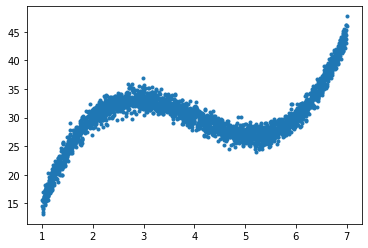

In [4]:
data_size = 3000

# create train data
x_obs =  6*np.random.rand(data_size)+1
y_obs = target_function(x_obs)

# train data plot
plt.scatter(x_obs, y_obs, marker='.')
plt.show()

## Set Network Parameter

In [5]:
mlp = RegressionMLP(input_layer_size=1, hidden_layer_size=30, output_layer_size=1)

## Plot Pre-learning function

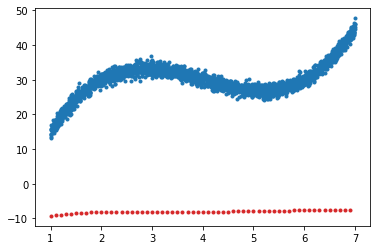

In [6]:
x_check = np.arange(1,7,0.1)
plt.scatter(x_obs, y_obs, marker='.', color="tab:blue")
for x in x_check:
    y_pred = mlp.forward(x)
    plt.scatter(x, y_pred, marker='.', color="tab:red")
plt.show()

## Train the Network

In [7]:
epochs = 1
for epoch in tqdm.tqdm(range(epochs)):
    for i in range(data_size):
        t = y_obs[i]
        x = x_obs[i]
        y_pred = mlp.forward(x)
        # print(y_pred.shape)
        mlp.backward(x, t, y_pred)
        mlp.step()

100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


## Plot Post-learning function

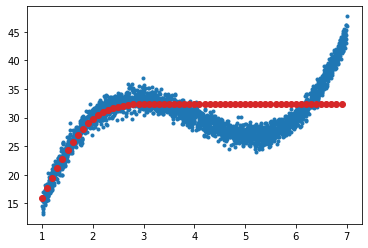

In [8]:
x_check = np.arange(1,7,0.1)
plt.scatter(x_obs, y_obs, marker='.', color="tab:blue")
for x in x_check:
    y_pred = mlp.forward(x)
    plt.scatter(x, y_pred, marker='o', color="tab:red")
plt.show()

In [9]:
def practice3_2_1(hidden_unit_size=30, train_sample_num=3000, learning_rate=0.1):
    # set network parameter
    mlp = RegressionMLP(input_layer_size=1, hidden_layer_size=hidden_unit_size, output_layer_size=1)
    mlp.lr = learning_rate

    plt.figure(figsize=(12,4))

    # generate observation (x, y)
    plt.subplot(1, 3, 1)
    plt.title("observation")
    data_size = train_sample_num
    x_obs =  6*np.random.rand(data_size)+1
    y_obs = target_function(x_obs)
    plt.scatter(x_obs, y_obs, marker='.')

    # plot pre-learning function
    plt.subplot(1, 3, 2)
    plt.title("Output before learning")
    x_check = np.arange(1,7,0.1)
    plt.scatter(x_obs, y_obs, marker='.', color="tab:blue")
    for x in x_check:
        y_pred = mlp.forward(x)
        plt.scatter(x, y_pred, marker='.', color="tab:red")

    # train network
    epochs = 1
    for epoch in tqdm.tqdm(range(epochs)):
        for i in range(data_size):
            t = y_obs[i]
            x = x_obs[i]
            y_pred = mlp.forward(x)
            # print(y_pred.shape)
            mlp.backward(x, t, y_pred)
            mlp.step()
    
    # plot post-learning function
    plt.subplot(1, 3, 3)
    plt.title("Output after learning")
    # x_check = np.arange(1,7,0.1)
    plt.scatter(x_obs, y_obs, marker='.', color="tab:blue")
    for x in x_check:
        y_pred = mlp.forward(x)
        plt.scatter(x, y_pred, marker='.', color="tab:red")
    
    plt.show()


ベースライン

100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


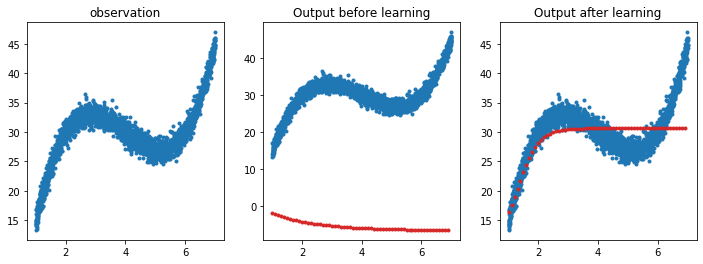

In [10]:
practice3_2_1(hidden_unit_size=10, train_sample_num=3000, learning_rate=0.01)

ユニット数を増やすことによって、MLPの表現力の向上が確認できる

100%|██████████| 1/1 [00:00<00:00,  5.91it/s]


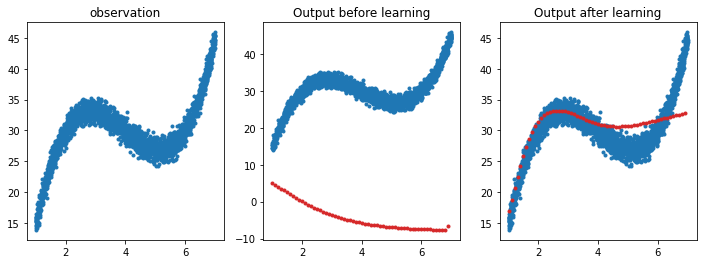

In [11]:
practice3_2_1(hidden_unit_size=100, train_sample_num=3000, learning_rate=0.01)

データ数を増やすことによって、より学習が進行していることがわかる

100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


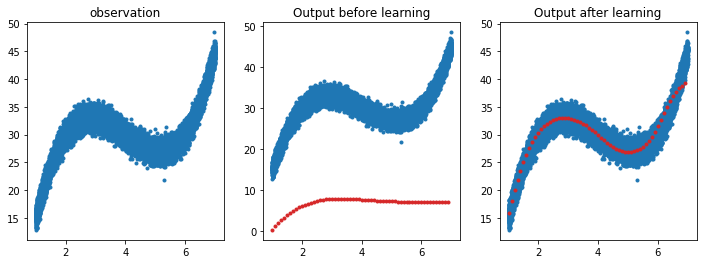

In [12]:
practice3_2_1(hidden_unit_size=100, train_sample_num=30000, learning_rate=0.01)

学習率を下げることで、より適切にデータにフィットした関数を学習していることがわかる

100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


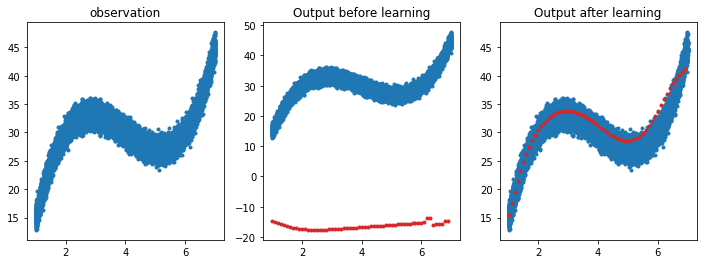

In [13]:
practice3_2_1(hidden_unit_size=100, train_sample_num=30000, learning_rate=0.005)